In [1]:
! pip install scipy


In [2]:
import pandas as pd
import sys
sys.path.append('../src')
from functions import *
import seaborn as sns

df_clients_profile = pd.read_csv('../Data/raw/df_final_demo.txt')
df_web_data_1 = pd.read_csv('../Data/raw/df_final_web_data_pt_1.txt')
df_web_data_2 = pd.read_csv('../Data/raw/df_final_web_data_pt_2.txt')
df_experiment_clients = pd.read_csv('../Data/raw/df_final_experiment_clients.txt')
pd.set_option('display.max_columns', None)
df_web_data = pd.concat([df_web_data_1, df_web_data_2], ignore_index= True)

FileNotFoundError: [Errno 2] No such file or directory: '../Data/raw/df_final_demo.txt'

In [ ]:
#lenght of the dataframes
lenght_clients_profile = print(df_clients_profile.shape)
lenght_experiment_clients = print(df_experiment_clients.shape)
lengt_web_data = print(df_web_data.shape)

(70609, 9)
(70609, 2)
(755405, 5)


In [ ]:
#clean df
df_clients_profile = print_clean_data(df_clients_profile)

Before
client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64
------------------------------------------
------------------------------------------
After
client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64


In [ ]:
#clean df
df_experiment_clients = print_clean_data(df_experiment_clients)

Before
client_id        0
Variation    20109
dtype: int64
------------------------------------------
To many NaN values in column: Variation
------------------------------------------
After
client_id        0
Variation    20109
dtype: int64


In [ ]:
#clean df
df_web_data = print_clean_data(df_web_data)

Before
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64
------------------------------------------
------------------------------------------
After
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64


In [ ]:
df_null_experiment_clients = df_experiment_clients.isna()
df_null_experiment_clients

,client_id,Variation
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
70604,False,True
70605,False,True
70606,False,True
70607,False,True


In [ ]:
df_experiment_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [ ]:
#setting aside the clients that wont be part if the experiment
null_df_experiment_clients = df_experiment_clients[df_experiment_clients['Variation'].isnull()]
null_df_experiment_clients

,client_id,Variation
50500,5459747,NaN
50501,8031000,NaN
50502,1847030,NaN
50503,9713157,NaN
50504,7775828,NaN
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [ ]:
#id of clients that are part of the test
df_experiment_clients_Test = df_experiment_clients[df_experiment_clients['Variation'] == 'Test']
df_experiment_clients_Test.head(10)

,client_id,Variation
0,9988021,Test
1,8320017,Test
3,1982004,Test
5,9466803,Test
6,3170143,Test
8,5887227,Test
10,438567,Test
11,2519971,Test
13,5407849,Test
16,5308474,Test


In [ ]:
final_df_Test = pd.merge(df_experiment_clients_Test, df_clients_profile, on='client_id', how='inner')
final_df_Test = pd.merge(df_web_data, final_df_Test, on='client_id', how='inner')
df_test = final_df_Test
df_test.to_csv('df_test.csv', index=False)
#change the data type to datetime
df_test['date_time'] = pd.to_datetime(df_test['date_time']) 
df_test.head(5)

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0


In [ ]:
df_test.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'Variation', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [ ]:
df_experiment_clients_Control = df_experiment_clients[df_experiment_clients['Variation'] == 'Control']
final_df_Control = pd.merge(df_experiment_clients_Control, df_clients_profile, on='client_id', how='inner')
final_df_Control = pd.merge(df_web_data, final_df_Control, on='client_id', how='inner')
df_control = final_df_Control
df_control.to_csv('df_control.csv', index=False)
#change the data type to datetime
df_control['date_time'] = pd.to_datetime(df_control['date_time']) 
df_control.head(20)

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:03,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
1,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:01,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
2,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:28:52,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:26:08,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
4,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:24:43,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
5,4033851,762728880_76361333336,949661017_22392791362_127391,step_1,2017-04-05 12:24:12,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
6,4033851,762728880_76361333336,949661017_22392791362_127391,start,2017-04-05 12:24:04,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
7,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:10:26,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
8,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:10:26,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
9,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:10:25,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0


# Day 1 & 2 (Week 5)

Answer the following questions about demographics:

Who are the primary clients using this online process?
Are the primary clients younger or older, new or long-standing?


In [ ]:
# Displaying the data types of each column in the dataframe
df_test.dtypes

client_id                    int64
visitor_id                  object
visit_id                    object
process_step                object
date_time           datetime64[ns]
Variation                   object
clnt_tenure_yr             float64
clnt_tenure_mnth           float64
clnt_age                   float64
gendr                       object
num_accts                  float64
bal                        float64
calls_6_mnth               float64
logons_6_mnth              float64
dtype: object

In [ ]:
# Displaying the data types of each column in the dataframe
df_control.dtypes

client_id                    int64
visitor_id                  object
visit_id                    object
process_step                object
date_time           datetime64[ns]
Variation                   object
clnt_tenure_yr             float64
clnt_tenure_mnth           float64
clnt_age                   float64
gendr                       object
num_accts                  float64
bal                        float64
calls_6_mnth               float64
logons_6_mnth              float64
dtype: object

In [ ]:
# Retrieving the unique data types present in the df_test
list(set(df_test.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('<M8[ns]'), dtype('O')]

In [ ]:
# Retrieving the unique data types present in the df_control
list(set(df_control.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('<M8[ns]'), dtype('O')]

In [ ]:
# Extracting column names with numerical data types from the dataframe
df_test.select_dtypes("number").columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [ ]:
# Counting and sorting the unique values for each numerical column in descending order
df_test.select_dtypes("number").nunique().sort_values(ascending=False)

client_id           26961
bal                 26907
clnt_tenure_mnth      444
clnt_age              157
clnt_tenure_yr         49
num_accts               7
calls_6_mnth            7
logons_6_mnth           7
dtype: int64

In [ ]:
# Extracting column names with numerical data types from the dataframe
df_control.select_dtypes("number").columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [ ]:
# Counting and sorting the unique values for each numerical column in descending order
df_control.select_dtypes("number").nunique().sort_values(ascending=False)

client_id           23526
bal                 23488
clnt_tenure_mnth      443
clnt_age              155
clnt_tenure_yr         52
calls_6_mnth            7
logons_6_mnth           7
num_accts               6
dtype: int64

In [ ]:
df_control.head(10).sort_index()

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:03,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
1,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:01,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
2,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:28:52,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:26:08,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
4,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:24:43,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
5,4033851,762728880_76361333336,949661017_22392791362_127391,step_1,2017-04-05 12:24:12,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
6,4033851,762728880_76361333336,949661017_22392791362_127391,start,2017-04-05 12:24:04,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
7,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:10:26,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
8,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:10:26,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
9,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:10:25,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0


In [ ]:
df_control.columns


Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'Variation', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'date',
       'next_date_time', 'time_diff_seconds', 'time_diff_minutes'],
      dtype='object')

In [ ]:

import pandas as pd

# ... (Your code to read the data into df_control) ...

# 1. Data Preparation:
df_control['date_time'] = pd.to_datetime(df_control['date_time'])
df_control['date'] = df_control['date_time'].dt.date

# 2. Calculate time differences per step and make them positive:
# We need to sort the dataframe before calculating the time difference
df_control = df_control.sort_values(by=['visit_id', 'client_id', 'date_time'])

df_control['next_date_time'] = df_control.groupby(['visit_id', 'client_id'])['date_time'].shift(-1)


# Calculate time spent in seconds, but make sure it's always positive
df_control['time_diff_seconds'] = (df_control['next_date_time'] - df_control['date_time']).dt.total_seconds()
df_control['time_diff_minutes'] = df_control['time_diff_seconds'] / 60

In [ ]:
df_control[(df_control.visit_id == '543158812_46395476577_767725') & (df_control.visitor_id == '194240915_18158000533')].sort_values('date_time')

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,date,next_date_time,time_diff_seconds,time_diff_minutes
106532,1104,194240915_18158000533,543158812_46395476577_767725,start,2017-06-12 07:49:18,Control,5.0,66.0,48.0,U,3.0,154643.94,6.0,9.0,2017-06-12,NaT,NaN,NaN


In [ ]:
df_control[(df_control.visit_id == '557292053_87239438319_391157')].sort_values('date_time')

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,date,next_date_time,time_diff_seconds,time_diff_minutes
55140,1028,42237450_62128060588,557292053_87239438319_391157,start,2017-04-08 18:51:28,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,2017-04-08 18:52:17,49.0,0.816667
55139,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:52:17,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,2017-04-08 18:53:20,63.0,1.050000
55138,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:53:20,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,2017-04-08 18:53:29,9.0,0.150000
55137,1028,42237450_62128060588,557292053_87239438319_391157,step_2,2017-04-08 18:53:29,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,2017-04-08 18:58:04,275.0,4.583333
55136,1028,42237450_62128060588,557292053_87239438319_391157,step_3,2017-04-08 18:58:04,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,2017-04-08 18:59:55,111.0,1.850000
55135,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:59:55,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,2017-04-08 19:00:15,20.0,0.333333
55134,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 19:00:15,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,2017-04-08 19:00:17,2.0,0.033333
55133,1028,42237450_62128060588,557292053_87239438319_391157,step_2,2017-04-08 19:00:17,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,2017-04-08 19:00:26,9.0,0.150000
55132,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 19:00:26,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,NaT,NaN,NaN


In [ ]:

# 3. Pivot to Create Step Columns:
df_pivot = df_control.pivot_table(index=['client_id', 'visitor_id', 'visit_id'], columns='process_step', values='time_diff_minutes', fill_value=0, aggfunc='sum')
df_pivot = df_pivot.reset_index()
df_pivot.columns.name = None  # Remove the 'process_step' header

In [ ]:
df_pivot.head(10)

,client_id,visitor_id,visit_id,confirm,start,step_1,step_2,step_3
0,1028,42237450_62128060588,557292053_87239438319_391157,0.0,0.816667,1.566667,4.733333,1.850000
1,1104,194240915_18158000533,543158812_46395476577_767725,0.0,0.000000,0.000000,0.000000,0.000000
2,1104,194240915_18158000533,643221571_99977972121_69283,0.0,0.000000,0.000000,0.000000,0.000000
3,1186,446844663_31615102958,507052512_11309370126_442139,0.0,0.000000,0.000000,0.000000,0.000000
4,1186,446844663_31615102958,795373564_99931517312_810896,0.0,0.183333,0.183333,0.000000,0.000000
5,1195,766842522_69992551638,393817425_39015278493_996341,0.0,0.550000,1.633333,0.516667,1.383333
6,1197,753759429_54481946928,71862471_21202285428_848395,0.0,0.066667,0.100000,0.950000,0.466667
7,1368,366307863_19014662045,784065271_45379483290_309335,0.0,0.000000,0.000000,0.000000,0.000000
8,2439,607208067_70160939111,848231744_22569944243_37711,0.0,0.000000,0.000000,0.000000,0.000000
9,2581,770616558_80928163524,182925466_27021409208_83502,0.0,0.000000,0.000000,0.000000,0.000000


In [ ]:
# 4. Rename Columns & Calculate Total Time:
df_pivot = df_pivot.rename(columns={'confirm': 'confirm_time', 'start': 'start_time', 'step_1': 'step_1', 'step_2': 'step_2', 'step_3': 'step_3'})

df_pivot['total_time_visit'] = df_pivot[['start_time', 'step_1', 'step_2', 'step_3', 'confirm_time']].sum(axis=1)



In [ ]:

# 5. Merge with Original Data and Select/Reorder Columns:
final_df = pd.merge(df_pivot, df_control[['client_id', 'visit_id','Variation', 'clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal',
       'calls_6_mnth', 'logons_6_mnth', 'date', 'process_step']], on=['client_id', 'visit_id'], how='left')
final_df

,client_id,visitor_id,visit_id,confirm_time,start_time,step_1,step_2,step_3,total_time_visit,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,date,process_step
0,1028,42237450_62128060588,557292053_87239438319_391157,0.0,0.816667,1.566667,4.733333,1.850000,8.966667,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,start
1,1028,42237450_62128060588,557292053_87239438319_391157,0.0,0.816667,1.566667,4.733333,1.850000,8.966667,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,step_1
2,1028,42237450_62128060588,557292053_87239438319_391157,0.0,0.816667,1.566667,4.733333,1.850000,8.966667,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,step_1
3,1028,42237450_62128060588,557292053_87239438319_391157,0.0,0.816667,1.566667,4.733333,1.850000,8.966667,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,step_2
4,1028,42237450_62128060588,557292053_87239438319_391157,0.0,0.816667,1.566667,4.733333,1.850000,8.966667,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,step_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143403,9998346,292425655_16607136645,189177304_69869411700_783154,0.0,1.033333,1.016667,1.450000,8.966667,12.466667,Control,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,2017-03-29,step_3
143404,9998346,292425655_16607136645,189177304_69869411700_783154,0.0,1.033333,1.016667,1.450000,8.966667,12.466667,Control,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,2017-03-29,step_3
143405,9998346,292425655_16607136645,189177304_69869411700_783154,0.0,1.033333,1.016667,1.450000,8.966667,12.466667,Control,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,2017-03-29,confirm
143406,9998346,292425655_16607136645,189177304_69869411700_783154,0.0,1.033333,1.016667,1.450000,8.966667,12.466667,Control,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,2017-03-29,step_3


In [ ]:

#Reorder to desired column order
final_df = final_df[['client_id', 'visitor_id', 'visit_id', 'Variation', 'clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal',
       'calls_6_mnth', 'logons_6_mnth', 'date', 'start_time',
       'step_1', 'step_2', 'step_3', 'confirm_time','total_time_visit', 'process_step']]

In [ ]:

# Get last step per visit_id
final_df['last_step'] = final_df.groupby('visit_id')['process_step'].transform('last')
df_control_final = final_df


/tmp/ipykernel_13836/604591985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['last_step'] = final_df.groupby('visit_id')['process_step'].transform('last')


In [ ]:
df_control_final['last_step']

0         step_1
1         step_1
2         step_1
3         step_1
4         step_1
           ...  
143403    step_3
143404    step_3
143405    step_3
143406    step_3
143407     start
Name: last_step, Length: 143408, dtype: object

In [ ]:
df_control_final.head(10)


,client_id,visitor_id,visit_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,date,start_time,step_1,step_2,step_3,confirm_time,total_time_visit,process_step,last_step
0,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.85,0.0,8.966667,start,step_1
1,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.85,0.0,8.966667,step_1,step_1
2,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.85,0.0,8.966667,step_1,step_1
3,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.85,0.0,8.966667,step_2,step_1
4,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.85,0.0,8.966667,step_3,step_1
5,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.85,0.0,8.966667,step_1,step_1
6,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.85,0.0,8.966667,step_1,step_1
7,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.85,0.0,8.966667,step_2,step_1
8,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.85,0.0,8.966667,step_1,step_1
9,1104,194240915_18158000533,543158812_46395476577_767725,Control,5.0,66.0,48.0,U,3.0,154643.94,6.0,9.0,2017-06-12,0.000000,0.000000,0.000000,0.00,0.0,0.000000,start,start


In [ ]:
df_control_final = df_control_final.drop(columns=['process_step'])


In [ ]:
df_control_final

,client_id,visitor_id,visit_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,date,start_time,step_1,step_2,step_3,confirm_time,total_time_visit,last_step
0,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.850000,0.0,8.966667,step_1
1,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.850000,0.0,8.966667,step_1
2,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.850000,0.0,8.966667,step_1
3,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.850000,0.0,8.966667,step_1
4,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.850000,0.0,8.966667,step_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143403,9998346,292425655_16607136645,189177304_69869411700_783154,Control,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,2017-03-29,1.033333,1.016667,1.450000,8.966667,0.0,12.466667,step_3
143404,9998346,292425655_16607136645,189177304_69869411700_783154,Control,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,2017-03-29,1.033333,1.016667,1.450000,8.966667,0.0,12.466667,step_3
143405,9998346,292425655_16607136645,189177304_69869411700_783154,Control,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,2017-03-29,1.033333,1.016667,1.450000,8.966667,0.0,12.466667,step_3
143406,9998346,292425655_16607136645,189177304_69869411700_783154,Control,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,2017-03-29,1.033333,1.016667,1.450000,8.966667,0.0,12.466667,step_3


In [ ]:
completed_visits = df_control_final['last_step'] == 'confirm'

In [ ]:
df_control_final['visit_visitor_id'] = df_control_final['visitor_id'] + " " +df_control_final['visit_id'] 

In [ ]:
df_control_final.head(20)

,client_id,visitor_id,visit_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,date,start_time,step_1,step_2,step_3,confirm_time,total_time_visit,last_step,visit_visitor_id
0,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.850000,0.0,8.966667,step_1,42237450_62128060588 557292053_87239438319_391157
1,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.850000,0.0,8.966667,step_1,42237450_62128060588 557292053_87239438319_391157
2,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.850000,0.0,8.966667,step_1,42237450_62128060588 557292053_87239438319_391157
3,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.850000,0.0,8.966667,step_1,42237450_62128060588 557292053_87239438319_391157
4,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.850000,0.0,8.966667,step_1,42237450_62128060588 557292053_87239438319_391157
5,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.850000,0.0,8.966667,step_1,42237450_62128060588 557292053_87239438319_391157
6,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.850000,0.0,8.966667,step_1,42237450_62128060588 557292053_87239438319_391157
7,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.850000,0.0,8.966667,step_1,42237450_62128060588 557292053_87239438319_391157
8,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.850000,0.0,8.966667,step_1,42237450_62128060588 557292053_87239438319_391157
9,1104,194240915_18158000533,543158812_46395476577_767725,Control,5.0,66.0,48.0,U,3.0,154643.94,6.0,9.0,2017-06-12,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,start,194240915_18158000533 543158812_46395476577_76...


In [ ]:

df_control_final = df_control_final.drop(columns=['visitor_id', 'visit_id'])


In [ ]:
completed_visits = df_control_final['last_step'] == 'confirm'

In [ ]:
#Reorder to desired column order
df_control_final = df_control_final[['client_id', 'visit_visitor_id', 'Variation', 'clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal',
       'calls_6_mnth', 'logons_6_mnth', 'date', 'start_time',
       'step_1', 'step_2', 'step_3', 'confirm_time','total_time_visit','last_step']]
df_control_final.shape

(143408, 19)

In [ ]:
df_control_final = df_control_final.drop_duplicates(subset='visit_visitor_id', keep='first')

In [ ]:
df_control_final.shape

(32181, 19)

In [ ]:
completed_visits = df_control_final['last_step'] == 'confirm'

In [ ]:

def basic_statistics(df: pd.DataFrame, columns):
    statistics = {}  # Dictionary to store statistics for each column

    for column in columns:
        if pd.api.types.is_numeric_dtype(df[column]):  # Check if column is numeric
            # central tendency
            median = df[column].median()
            mode = df[column].mode().iloc[0]  # Get first mode if there are multiple
            mean = df[column].mean()

            # dispersion
            std_dev = df[column].std()
            variance = df[column].var()
            range_value = df[column].max() - df[column].min()  # Use range_value to avoid overwriting built-in range
            quantiles = df[column].quantile([0.25, 0.5, 0.75])  # Calculate 25th, 50th, 75th percentiles
            inter_QR = quantiles[0.75] - quantiles[0.25]

            # shape
            skewness = df[column].skew()
            kurtosis = df[column].kurtosis()

            statistics[column] = {
                'median': median,
                'mode': mode,
                'mean': mean,
                'std_dev': std_dev,
                'variance': variance,
                'range': range_value,
                '25th_percentile': quantiles[0.25],
                'median': quantiles[0.5],
                '75th_percentile': quantiles[0.75],
                'IQR': inter_QR,
                'skewness': skewness,
                'kurtosis': kurtosis
            }
        else:
            statistics[column] = 'Non-numeric column'  # Add a message for non-numeric columns
    
    #create new dataframe
    df_statistics = pd.DataFrame.from_dict(statistics)

    return df_statistics.transpose() #transpose to have columns as the variables

In [ ]:
df_control_final.shape

(32181, 19)

In [ ]:
completed_visits = df_control_final['last_step'] == 'confirm'

In [ ]:
numerical_columns = ['clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal',
       'calls_6_mnth', 'logons_6_mnth', 'start_time', 'step_1',
       'step_2', 'step_3', 'confirm_time', 'total_time_visit']
basic_statistics(df_control_final, numerical_columns)

,median,mode,mean,std_dev,variance,range,25th_percentile,75th_percentile,IQR,skewness,kurtosis
clnt_tenure_yr,11.000000,6.00,12.347659,7.046790,4.965725e+01,5.300000e+01,6.000000,16.000000,10.000000,0.963727,0.731838
clnt_tenure_mnth,141.000000,58.00,154.159691,84.174236,7.085302e+03,6.360000e+02,82.000000,196.000000,114.000000,0.978157,0.763696
clnt_age,50.000000,62.00,48.699124,15.786724,2.492207e+02,7.900000e+01,35.000000,61.000000,26.000000,0.006048,-0.931828
num_accts,2.000000,2.00,2.281470,0.563948,3.180373e-01,5.000000e+00,2.000000,2.000000,0.000000,2.210979,5.601942
bal,70244.510000,53955.97,163254.557393,314866.072233,9.914064e+10,8.269207e+06,41720.550000,154313.850000,112593.300000,8.318638,118.358605
calls_6_mnth,3.000000,6.00,3.335571,2.192798,4.808365e+00,6.000000e+00,1.000000,6.000000,5.000000,-0.111180,-1.447024
logons_6_mnth,6.000000,9.00,6.372021,2.180042,4.752584e+00,6.000000e+00,4.000000,9.000000,5.000000,-0.130962,-1.434358
start_time,0.283333,0.00,1.233545,5.622045,3.160739e+01,6.992833e+02,0.083333,0.800000,0.716667,64.287255,7469.148592
step_1,0.183333,0.00,0.679629,2.856209,8.157930e+00,2.683000e+02,0.000000,0.616667,0.616667,38.205677,2775.160143
step_2,0.650000,0.00,1.155187,2.865290,8.209887e+00,3.627167e+02,0.000000,1.566667,1.566667,65.275621,7911.530474


In [ ]:
steps = ['step_1','step_2', 'step_3', 'confirm_time', 'total_time_visit']
df_steps = pd.DataFrame(basic_statistics(df_control_final,steps))

In [ ]:
df_steps

,median,mode,mean,std_dev,variance,range,25th_percentile,75th_percentile,IQR,skewness,kurtosis
step_1,0.183333,0.0,0.679629,2.856209,8.157930,268.300000,0.000000,0.616667,0.616667,38.205677,2775.160143
step_2,0.650000,0.0,1.155187,2.865290,8.209887,362.716667,0.000000,1.566667,1.566667,65.275621,7911.530474
step_3,0.350000,0.0,1.437567,3.419878,11.695565,121.133333,0.000000,1.533333,1.533333,8.884437,164.196471
confirm_time,0.000000,0.0,0.167699,2.324682,5.404146,156.600000,0.000000,0.000000,0.000000,34.400586,1583.563910
total_time_visit,2.666667,0.0,4.673628,8.828954,77.950422,699.416667,0.366667,5.683333,5.316667,22.242426,1361.882063


In [ ]:
completed_visits = df_control_final['last_step'] == 'confirm'

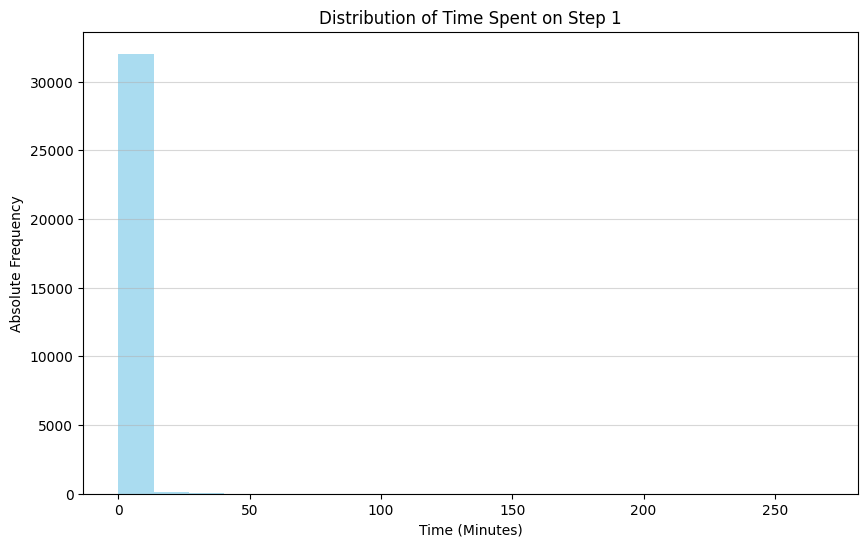

In [ ]:
import matplotlib.pyplot as plt

# Extract data for step_1
step_1_times = df_control_final['step_1']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(step_1_times, bins=20, color='skyblue', alpha=0.7)
plt.title('Distribution of Time Spent on Step 1')
plt.xlabel('Time (Minutes)')
plt.ylabel('Absolute Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

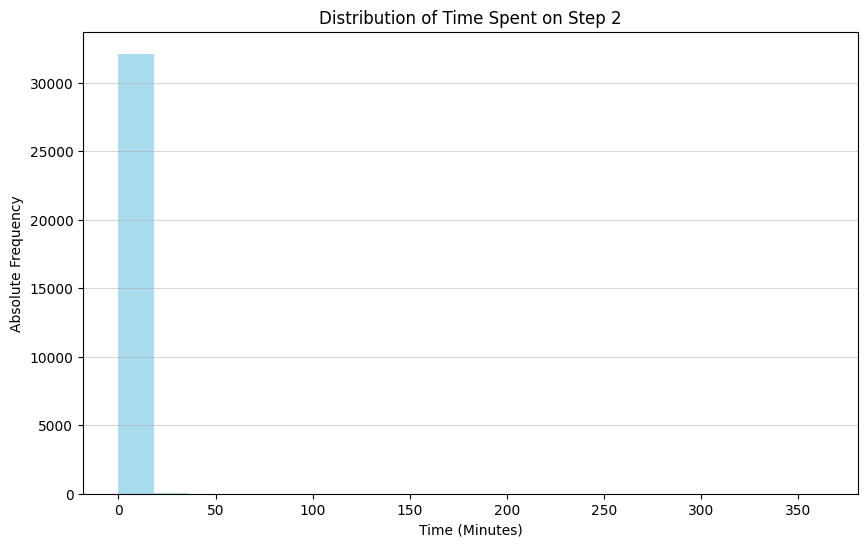

In [ ]:
import matplotlib.pyplot as plt

# Extract data for step_1
step_2_times = df_control_final['step_2']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(step_2_times, bins=20, color='skyblue', alpha=0.7)
plt.title('Distribution of Time Spent on Step 2')
plt.xlabel('Time (Minutes)')
plt.ylabel('Absolute Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

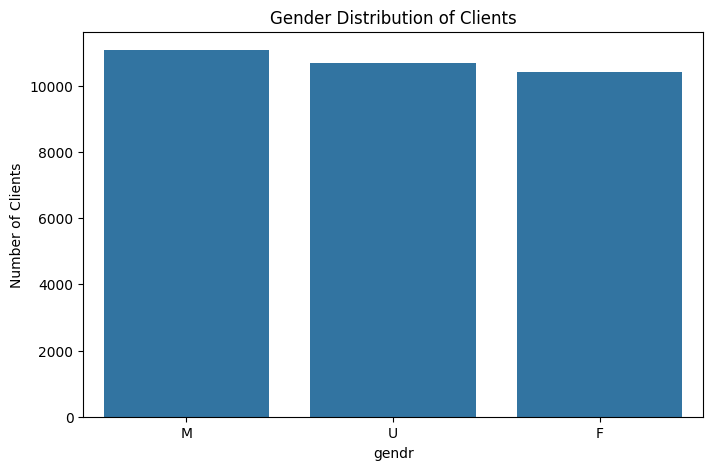

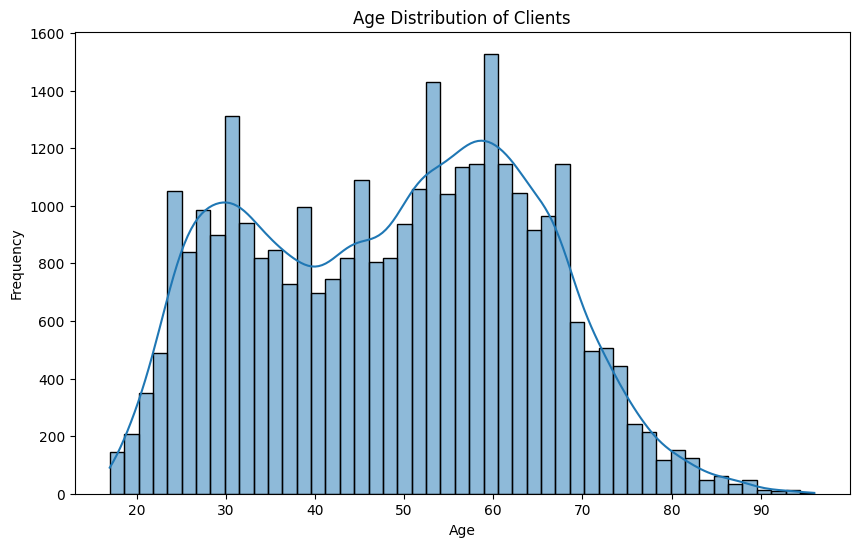

In [ ]:
# 1. Who are the primary clients using this online process?

# Gender distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df_control_final, x='gendr')
plt.title('Gender Distribution of Clients')
plt.ylabel('Number of Clients')
plt.show()

# Age distribution
plt.figure(figsize=(10,6))
sns.histplot(data=df_control_final, x='clnt_age', kde=True)
plt.title('Age Distribution of Clients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
completed_visits = df_control_final['last_step'] == 'confirm'

In [ ]:
# 2. Are the primary clients younger or older, new or long-standing?

print(f"Average client age: {df_control_final['clnt_age'].mean()}")
print(f"Average client tenure (months): {df_control_final['clnt_tenure_mnth'].mean()}")

Average client age: 48.69912370653491
Average client tenure (months): 154.15969050060596


In [ ]:
# 3. Client Behavior Analysis

# Time spent on each step (average)
step_columns = ['step_1', 'step_2', 'step_3']
average_time_per_step = df_control_final[step_columns].mean()
print("\nAverage time spent on each step:")
print(average_time_per_step)



Average time spent on each step:
step_1    0.679629
step_2    1.155187
step_3    1.437567
dtype: float64


In [ ]:
# Completion rate (assuming 'confirm_time' indicates completion)
completion_rate = df_control_final['confirm_time'].notnull().mean() * 100
print(f"\nOverall completion rate: {completion_rate:.2f}%")


Overall completion rate: 100.00%


In [ ]:
# Error rates (assuming empty values in step columns indicate errors)
error_rates = df_control_final[step_columns].isnull().mean() * 100
print("\nError rates per step:")
print(error_rates)


Error rates per step:
step_1    0.0
step_2    0.0
step_3    0.0
dtype: float64


In [ ]:
completed_visits = df_control_final['last_step'] == 'confirm'

In [ ]:
import pandas as pd

# 1. Data Preparation:
df_test['date_time'] = pd.to_datetime(df_test['date_time'])
df_test['date'] = df_test['date_time'].dt.date

# 2. Calculate time differences per step and make them positive:
# We need to sort the dataframe before calculating the time difference
df_test = df_test.sort_values(by=['visit_id', 'client_id', 'date_time'])

df_test['next_date_time'] = df_test.groupby(['visit_id', 'client_id'])['date_time'].shift(-1)


# Calculate time spent in seconds, but make sure it's always positive
df_test['time_diff_seconds'] = (df_test['next_date_time'] - df_test['date_time']).dt.total_seconds().abs()
df_test['time_diff_minutes'] = df_test['time_diff_seconds'] / 60

# 3. Pivot to Create Step Columns:
df_pivot = df_test.pivot_table(index=['client_id', 'visitor_id', 'visit_id'], columns='process_step', values='time_diff_minutes', fill_value=0)
df_pivot = df_pivot.reset_index()
df_pivot.columns.name = None  # Remove the 'process_step' header

# 4. Rename Columns & Calculate Total Time:
df_pivot = df_pivot.rename(columns={'confirm': 'confirm_time', 'start': 'start_time', 'step_1': 'step_1', 'step_2': 'step_2', 'step_3': 'step_3'})

df_pivot['total_time_visit'] = df_pivot[['start_time', 'step_1', 'step_2', 'step_3', 'confirm_time']].sum(axis=1)


# 5. Merge with Original Data and Select/Reorder Columns:
df_test_final = pd.merge(df_pivot, df_test[['client_id', 'visit_id','Variation', 'clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal',
       'calls_6_mnth', 'logons_6_mnth', 'date', 'process_step']], on=['client_id', 'visit_id'], how='left')

df_test_final = df_test_final.drop_duplicates()

#Reorder to desired column order
df_test_final = df_test_final[['client_id', 'visitor_id', 'visit_id', 'Variation', 'clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal',
       'calls_6_mnth', 'logons_6_mnth', 'date', 'start_time',
       'step_1', 'step_2', 'step_3', 'confirm_time','total_time_visit', 'process_step']]


# Get last step per visit_id
df_test_final['last_step'] = df_test_final.groupby('visit_id')['process_step'].transform('last')
df_test_final = df_test_final.drop(columns=['process_step'])

df_test_final = df_test_final.drop_duplicates()

In [ ]:
df_test_final['visit_visitor_id'] = df_test_final['visitor_id'] + " " +df_test_final['visit_id'] 

In [ ]:
#Reorder to desired column order
df_test_final = df_test_final[['client_id', 'visit_visitor_id', 'Variation', 'clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal',
       'calls_6_mnth', 'logons_6_mnth', 'date', 'start_time',
       'step_1', 'step_2', 'step_3', 'confirm_time','total_time_visit','last_step']]
df_test_final.shape


(31630, 19)

In [ ]:
df_test_final = df_test_final.drop_duplicates(subset='visit_visitor_id', keep='first')

In [ ]:
df_control_final.columns

Index(['client_id', 'visit_visitor_id', 'Variation', 'clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal',
       'calls_6_mnth', 'logons_6_mnth', 'date', 'start_time', 'step_1',
       'step_2', 'step_3', 'confirm_time', 'total_time_visit', 'last_step',
       'Design'],
      dtype='object')

In [ ]:
df_test_final.columns

Index(['client_id', 'visit_visitor_id', 'Variation', 'clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal',
       'calls_6_mnth', 'logons_6_mnth', 'date', 'start_time', 'step_1',
       'step_2', 'step_3', 'confirm_time', 'total_time_visit', 'last_step'],
      dtype='object')

In [ ]:
df_test_final.head(15)

,client_id,visit_visitor_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,date,start_time,step_1,step_2,step_3,confirm_time,total_time_visit,last_step
0,555,402506806_56087378777 637149525_38041617439_71...,Test,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,2017-04-15,0.116667,0.533333,1.650000,0.333333,0.000000,2.633333,confirm
5,647,66758770_53988066587 40369564_40101682850_311847,Test,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,2017-04-12,0.116667,0.300000,3.150000,2.716667,0.000000,6.283333,confirm
10,934,810392784_45004760546 7076463_57954418406_971348,Test,9.0,109.0,51.0,F,2.0,32522.88,0.0,3.0,2017-04-18,0.788889,0.000000,0.000000,0.000000,0.000000,0.788889,start
14,1336,920624746_32603333901 583743392_96265099036_93...,Test,48.0,576.0,42.0,M,4.0,130537.18,6.0,9.0,2017-05-08,0.416667,0.433333,0.850000,1.816667,0.000000,3.516667,confirm
19,1336,920624746_32603333901 614001770_19101025926_11...,Test,48.0,576.0,42.0,M,4.0,130537.18,6.0,9.0,2017-05-08,0.000000,0.000000,0.000000,0.000000,1.366667,1.366667,confirm
21,1346,123474046_4204671056 27144337_83739845380_214282,Test,14.0,177.0,46.0,F,2.0,822512.91,3.0,6.0,2017-06-06,0.530000,1.683333,0.816667,1.416667,0.000000,4.446667,step_3
31,1516,182314299_63168583136 255400977_38039535960_77...,Test,12.0,150.0,58.5,F,2.0,25408.39,5.0,8.0,2017-04-06,0.933333,0.583333,10.116667,4.266667,0.000000,15.900000,confirm
36,1516,182314299_63168583136 481123290_95510977345_70...,Test,12.0,150.0,58.5,F,2.0,25408.39,5.0,8.0,2017-04-05,0.266667,0.833333,0.361111,0.000000,0.000000,1.461111,step_2
47,1643,121807985_20524560478 753205700_16851596206_13...,Test,19.0,229.0,55.0,M,2.0,81731.39,0.0,3.0,2017-06-10,1.000000,0.266667,9.700000,0.500000,0.000000,11.466667,confirm
52,1643,910842861_51062379179 633860590_96880450633_97...,Test,19.0,229.0,55.0,M,2.0,81731.39,0.0,3.0,2017-04-24,0.733333,0.750000,0.000000,0.000000,0.000000,1.483333,step_1


In [ ]:
df_control_final.head(15)

,client_id,visit_visitor_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,date,start_time,step_1,step_2,step_3,confirm_time,total_time_visit,last_step,Design
0,1028,42237450_62128060588 557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,1.566667,4.733333,1.850000,0.0,8.966667,step_1,Old
9,1104,194240915_18158000533 543158812_46395476577_76...,Control,5.0,66.0,48.0,U,3.0,154643.94,6.0,9.0,2017-06-12,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,start,Old
10,1104,194240915_18158000533 643221571_99977972121_69283,Control,5.0,66.0,48.0,U,3.0,154643.94,6.0,9.0,2017-06-20,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,start,Old
11,1186,446844663_31615102958 507052512_11309370126_44...,Control,8.0,99.0,22.0,U,2.0,31662.52,0.0,3.0,2017-04-08,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,start,Old
12,1186,446844663_31615102958 795373564_99931517312_81...,Control,8.0,99.0,22.0,U,2.0,31662.52,0.0,3.0,2017-04-08,0.183333,0.183333,0.000000,0.000000,0.0,0.366667,step_2,Old
15,1195,766842522_69992551638 393817425_39015278493_99...,Control,21.0,262.0,54.5,M,2.0,28457.96,2.0,5.0,2017-04-05,0.550000,1.633333,0.516667,1.383333,0.0,4.083333,confirm,Old
20,1197,753759429_54481946928 71862471_21202285428_848395,Control,7.0,85.0,28.5,U,5.0,177062.14,5.0,8.0,2017-04-01,0.066667,0.100000,0.950000,0.466667,0.0,1.583333,confirm,Old
27,1368,366307863_19014662045 784065271_45379483290_30...,Control,5.0,60.0,45.0,F,3.0,61956.25,6.0,9.0,2017-04-09,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,start,Old
28,2439,607208067_70160939111 848231744_22569944243_37711,Control,11.0,142.0,56.0,M,2.0,504142.55,0.0,3.0,2017-03-23,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,start,Old
29,2581,770616558_80928163524 182925466_27021409208_83502,Control,4.0,58.0,22.0,M,2.0,24976.79,1.0,4.0,2017-04-09,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,start,Old


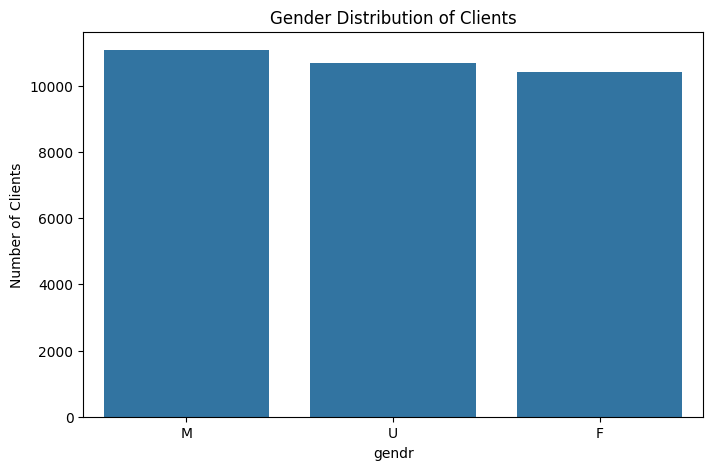

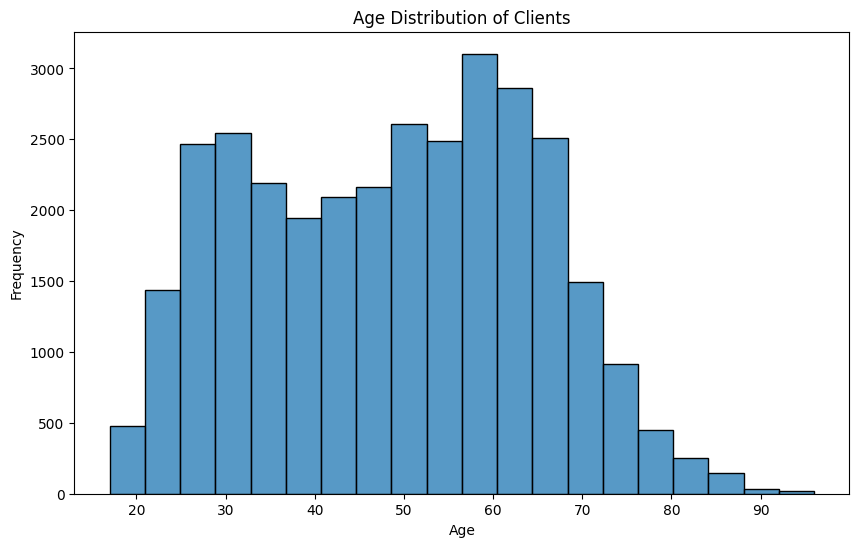

In [ ]:
# 1. Who are the primary clients using this online process?

# Gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df_control_final, x='gendr')
plt.title('Gender Distribution of Clients')
plt.ylabel('Number of Clients')
plt.show()

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df_control_final, x='clnt_age', bins=20, kde=False)
plt.title('Age Distribution of Clients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



In [ ]:
# 2. Are the primary clients younger or older, new or long-standing?
print("\nClient Demographics Summary:")
print(df_control_final[['clnt_age', 'clnt_tenure_mnth']].describe())




Client Demographics Summary:
           clnt_age  clnt_tenure_mnth
count  32181.000000      32181.000000
mean      48.699124        154.159691
std       15.786724         84.174236
min       17.000000         33.000000
25%       35.000000         82.000000
50%       50.000000        141.000000
75%       61.000000        196.000000
max       96.000000        669.000000


In [ ]:
completed_visits = df_control_final['last_step'] == 'confirm'

In [ ]:

# 3. Client Behavior Analysis

# Time spent per step
step_time_analysis = df_control_final[['start_time', 'step_1', 'step_2', 'step_3', 'confirm_time']].describe()
print("\nTime Spent on Each Step (in minutes):")
print(step_time_analysis)

# Completion Rate
completed_visits = df_control_final['last_step'] == 'confirm'
completion_rate = completed_visits.mean() * 100
print(f"\nOverall Completion Rate: {completion_rate:.2f}%")

# Error Rate (Assuming NaN in a step means the user did not complete it)
error_rates = df_control_final[['step_1', 'step_2', 'step_3']].isnull().mean() * 100
print("\nError Rates Per Step:")
print(error_rates)




Time Spent on Each Step (in minutes):
         start_time        step_1        step_2        step_3  confirm_time
count  32181.000000  32181.000000  32181.000000  32181.000000  32181.000000
mean       1.233545      0.679629      1.155187      1.437567      0.167699
std        5.622045      2.856209      2.865290      3.419878      2.324682
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.083333      0.000000      0.000000      0.000000      0.000000
50%        0.283333      0.183333      0.650000      0.350000      0.000000
75%        0.800000      0.616667      1.566667      1.533333      0.000000
max      699.283333    268.300000    362.716667    121.133333    156.600000

Overall Completion Rate: 47.66%

Error Rates Per Step:
step_1    0.0
step_2    0.0
step_3    0.0
dtype: float64


In [ ]:
# 4. KPI and Metrics Review
print("\nKey Performance Indicators (KPIs):")
print("- Completion Rate")
print("- Time Spent on Each Step")
print("- Error Rate per Step")
print("- Drop-off Rate per Step")  # (We'll calculate this below)

# Calculate Drop-off Rate per Step
def calculate_dropoff_rate(df, step_col):
    total_reached_step = df[step_col].notnull().sum()
    completed_after_step = df[df['last_step'] == 'confirm'][step_col].notnull().sum()
    return (1 - (completed_after_step / total_reached_step)) * 100

dropoff_rates = {
    'start_time': 0,  # No drop-off at the start
    'step_1': calculate_dropoff_rate(df_control_final, 'step_1'),
    'step_2': calculate_dropoff_rate(df_control_final, 'step_2'),
    'step_3': calculate_dropoff_rate(df_control_final, 'step_3')
}

print("\nDrop-off Rates per Step:")
print(dropoff_rates)


Key Performance Indicators (KPIs):
- Completion Rate
- Time Spent on Each Step
- Error Rate per Step
- Drop-off Rate per Step

Drop-off Rates per Step:
{'start_time': 0, 'step_1': np.float64(52.344551132655916), 'step_2': np.float64(52.344551132655916), 'step_3': np.float64(52.344551132655916)}


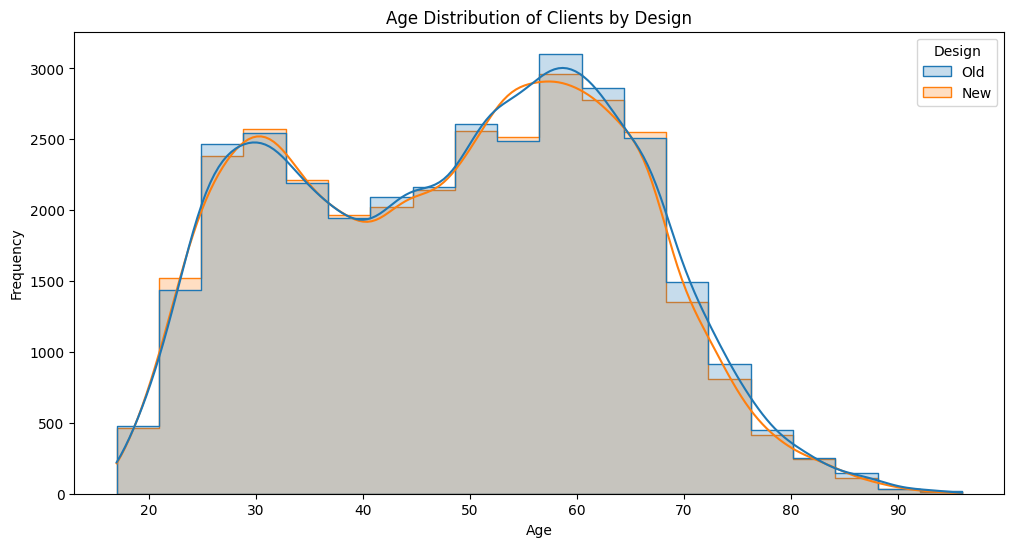

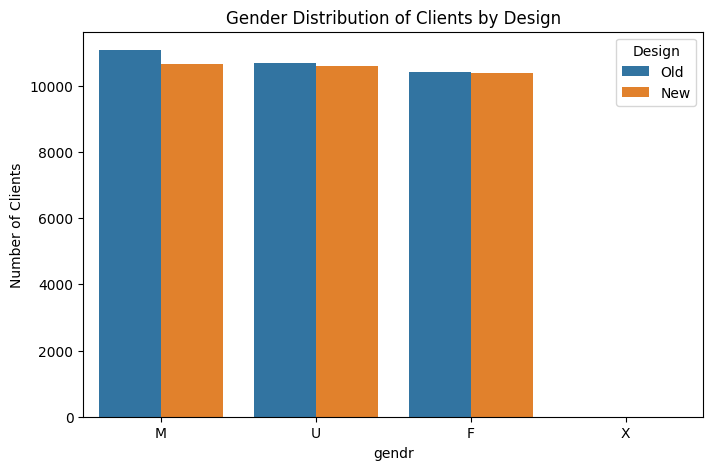


Client Demographics Summary by Design:
       clnt_age                                                      \
          count       mean        std   min   25%   50%   75%   max   
Design                                                                
New     31630.0  48.352087  15.662886  17.0  34.5  49.5  60.5  96.0   
Old     32181.0  48.699124  15.786724  17.0  35.0  50.0  61.0  96.0   

       clnt_tenure_mnth                                                   \
                  count        mean        std   min   25%    50%    75%   
Design                                                                     
New             31630.0  152.322257  83.028884  33.0  82.0  138.0  193.0   
Old             32181.0  154.159691  84.174236  33.0  82.0  141.0  196.0   

               
          max  
Design         
New     669.0  
Old     669.0  


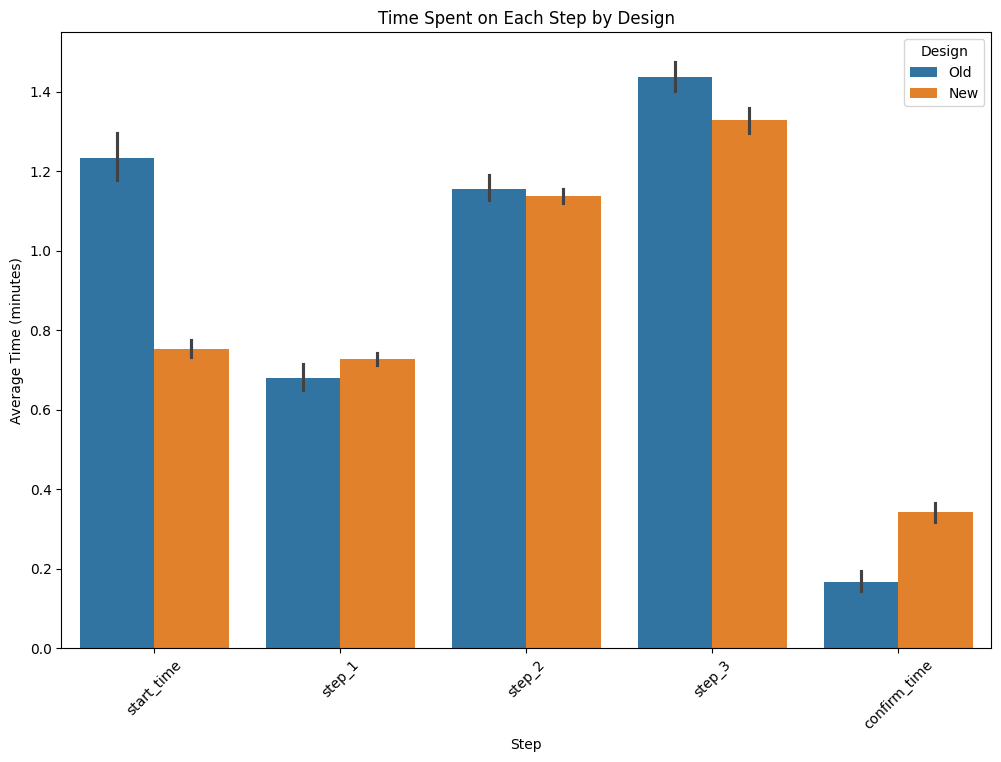


Key Performance Indicators (KPIs):
- Completion Rate
- Time Spent on Each Step
- Error Rate per Step (Assuming NaN indicates error)
- Drop-off Rate per Step

Completion Rate by Design:
Design
New    60.818843
Old    47.655449
Name: last_step, dtype: float64

Error Rates Per Step by Design:
        step_1  step_2  step_3
Design                        
New        0.0     0.0     0.0
Old        0.0     0.0     0.0

Drop-off Rates per Step by Design:
        start_time     step_1     step_2     step_3
Design                                             
New            0.0  39.181157  39.181157  39.181157
Old            0.0  52.344551  52.344551  52.344551


/tmp/ipykernel_13836/352563895.py:69: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dropoff_rates = combined_df.groupby('Design').apply(


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded the data into df_control_final and df_test_final

# Combine DataFrames and add a 'Design' column to distinguish between them
df_control_final['Design'] = 'Old'
df_test_final['Design'] = 'New'
combined_df = pd.concat([df_control_final, df_test_final])

# 1. Who are the primary clients using this online process?

plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df, x='clnt_age', hue='Design', bins=20, kde=True, element="step")
plt.title('Age Distribution of Clients by Design')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=combined_df, x='gendr', hue='Design')
plt.title('Gender Distribution of Clients by Design')
plt.ylabel('Number of Clients')
plt.show()

# 2. Are the primary clients younger or older, new or long-standing?
print("\nClient Demographics Summary by Design:")
print(combined_df.groupby('Design')[['clnt_age', 'clnt_tenure_mnth']].describe())

# 3. Client Behavior Analysis

# Time spent per step by design
plt.figure(figsize=(12, 8))
sns.barplot(data=combined_df.melt(id_vars=['visit_id', 'Design'], value_vars=['start_time', 'step_1', 'step_2', 'step_3', 'confirm_time']),
            x='variable', y='value', hue='Design')
plt.title('Time Spent on Each Step by Design')
plt.xlabel('Step')
plt.ylabel('Average Time (minutes)')
plt.xticks(rotation=45)
plt.show()

# 4 & 5. KPI Review & Identification
# Key Performance Indicators (KPIs)
print("\nKey Performance Indicators (KPIs):")
print("- Completion Rate")
print("- Time Spent on Each Step")
print("- Error Rate per Step (Assuming NaN indicates error)")
print("- Drop-off Rate per Step")

# 6. Calculate KPIs

# Completion Rate
completion_rate = combined_df.groupby('Design')['last_step'].apply(lambda x: (x == 'confirm').mean() * 100)
print("\nCompletion Rate by Design:")
print(completion_rate)

# Error Rates (Assuming NaN in a step means the user did not complete it)
error_rates = combined_df.groupby('Design')[['step_1', 'step_2', 'step_3']].apply(lambda x: x.isnull().mean() * 100)
print("\nError Rates Per Step by Design:")
print(error_rates)

# Drop-off Rate
def calculate_dropoff_rate(df, step_col):
    total_reached_step = df[step_col].notnull().sum()
    completed_after_step = df[df['last_step'] == 'confirm'][step_col].notnull().sum()
    return (1 - (completed_after_step / total_reached_step)) * 100 if total_reached_step > 0 else 0

dropoff_rates = combined_df.groupby('Design').apply(
    lambda x: pd.Series({
        'start_time': 0,  
        'step_1': calculate_dropoff_rate(x, 'step_1'),
        'step_2': calculate_dropoff_rate(x, 'step_2'),
        'step_3': calculate_dropoff_rate(x, 'step_3')
    })
)
print("\nDrop-off Rates per Step by Design:")
print(dropoff_rates)


In [ ]:
df_test_final.shape

(31498, 19)

In [ ]:
df_control_final.shape

(32181, 20)

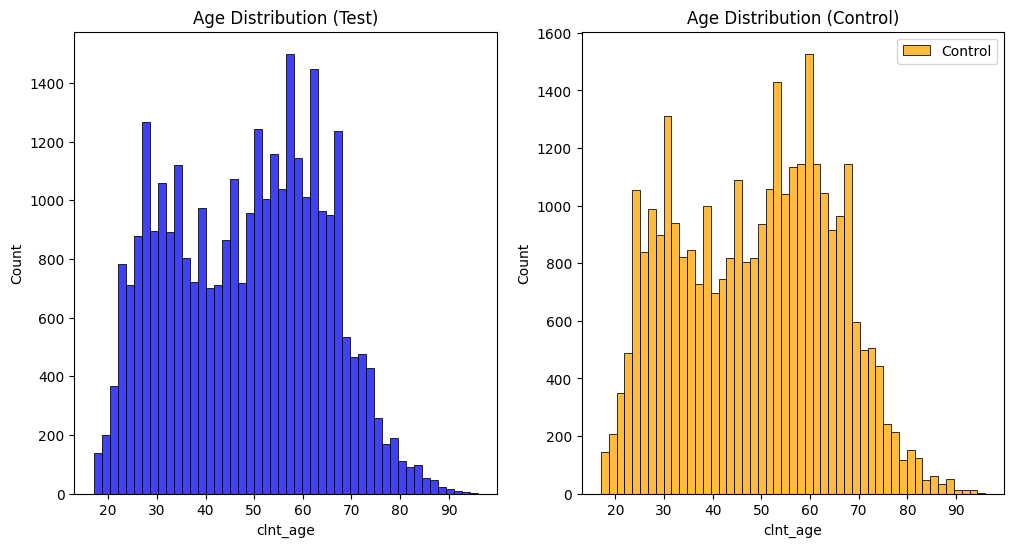

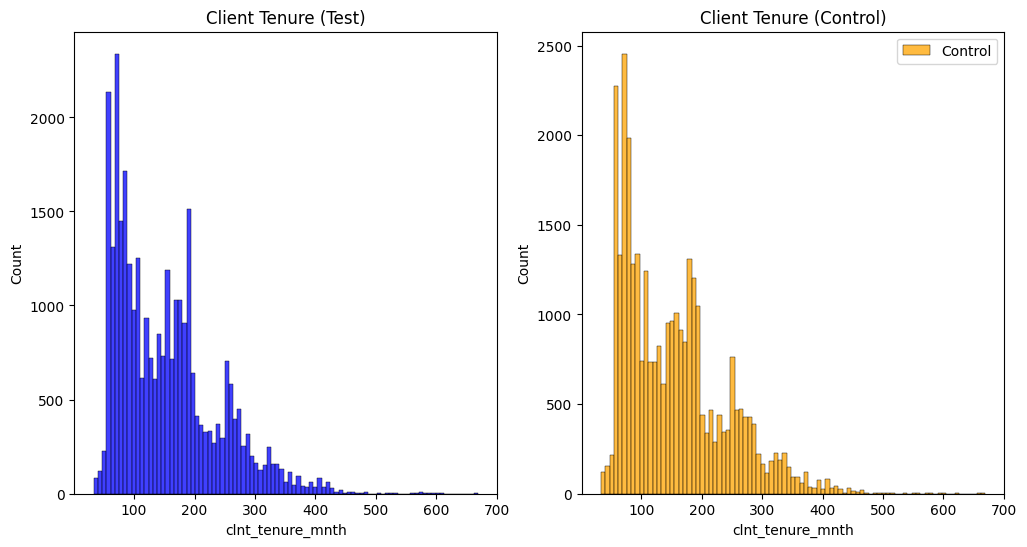

In [ ]:
# Age Distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_test_final['clnt_age'], kde=False, color='blue', label='Test')
plt.title('Age Distribution (Test)')

plt.subplot(1, 2, 2)
sns.histplot(df_control_final['clnt_age'], kde=False, color='orange', label='Control')
plt.title('Age Distribution (Control)')
plt.legend()
plt.show()

# Tenure Distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_test_final['clnt_tenure_mnth'], kde=False, color='blue', label='Test')
plt.title('Client Tenure (Test)')

plt.subplot(1, 2, 2)
sns.histplot(df_control_final['clnt_tenure_mnth'], kde=False, color='orange', label='Control')
plt.title('Client Tenure (Control)')
plt.legend()
plt.show()

Age Distribution:

Test Group (New Design): The age distribution appears slightly right-skewed, suggesting a higher concentration of younger clients in the test group. The majority of clients in the test group fall within the age range of 30-60. There's a notable decline in the number of clients above 70 years old.
Control Group (Old Design): The age distribution also seems right-skewed, similar to the test group. The majority of clients in the control group are also between 30-60 years old, with a similar decline in older clients.
Overall Comparison: Both distributions have a similar shape, but the test group seems to have slightly more younger clients and slightly fewer older clients than the control group. However, this difference appears subtle.
Client Tenure Distribution:

Test Group (New Design): The tenure distribution is heavily right-skewed, indicating a large number of clients with relatively short tenure (less than 100 months). There's a long tail with a smaller number of clients having much longer tenure.
Control Group (Old Design): The tenure distribution mirrors the test group, with a heavy right skew and a long tail. This suggests a similar pattern of client tenure in both groups.
Overall Comparison: The tenure distributions for both groups are very similar, indicating that the new design does not appear to attract or deter clients based on their tenure with the company.
Key Insights:

Primary Clients: The primary clients for both designs are middle-aged, with the majority falling between 30 and 60 years old.
Tenure Impact: The new design does not seem to significantly impact client tenure. Both groups exhibit similar tenure distributions.
Age Impact: There might be a slight tendency for the new design to attract relatively younger clients, but this difference is not very pronounced.

| KPI                  |     Test |   Control |
|:---------------------|---------:|----------:|
| Time Spent on Step 1 | 0.723915 |  0.679629 |
| Time Spent on Step 2 | 1.1341   |  1.15519  |
| Time Spent on Step 3 | 1.32291  |  1.43757  |
| Completion Rate      | 0.607467 |  0.476554 |


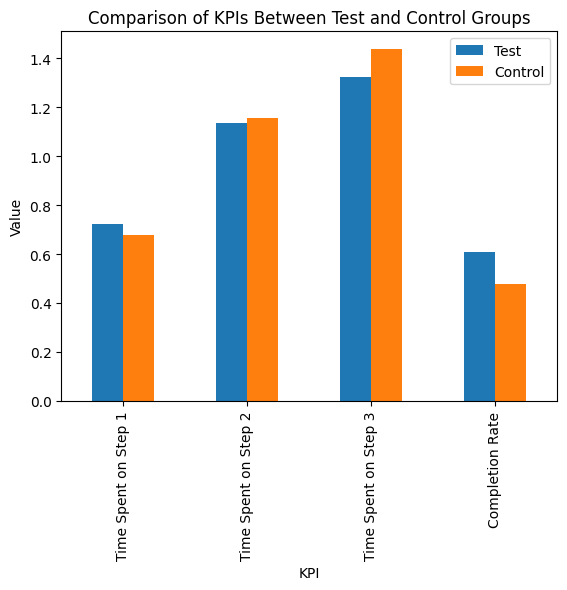

In [ ]:
# Calculate KPIs
def calculate_kpi(df):
    completion_rate = df['last_step'].eq('confirm').mean()
    time_step_1 = df['step_1'].mean()
    time_step_2 = df['step_2'].mean()
    time_step_3 = df['step_3'].mean()
    return time_step_1, time_step_2, time_step_3,completion_rate

test_kpis = calculate_kpi(df_test_final)
control_kpis = calculate_kpi(df_control_final)

# Create a DataFrame to store the results
kpi_df = pd.DataFrame({'KPI': ['Time Spent on Step 1', 'Time Spent on Step 2', 'Time Spent on Step 3','Completion Rate'],
                     'Test': test_kpis,
                     'Control': control_kpis})

print(kpi_df.to_markdown(index=False))


# Visualization:
kpi_df.plot(x='KPI', kind='bar')
plt.title('Comparison of KPIs Between Test and Control Groups')
plt.ylabel('Value')
plt.show()

